## Lab 2 Template

zID: 

Name: 

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [16]:
import math
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [17]:
cv2.__version__

'4.6.0'

In [18]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [19]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [20]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Village.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

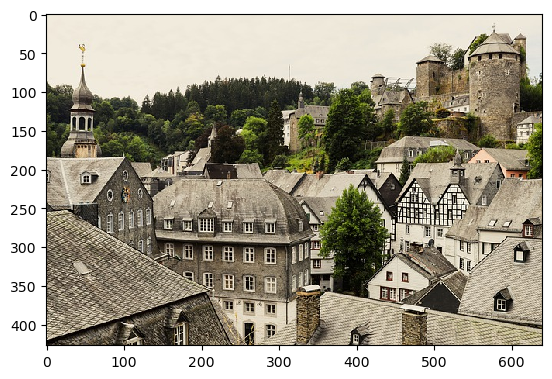

In [21]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)
img_path = 'Village.png'
I = cv2.imread(img_path, cv2.IMREAD_COLOR)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.imshow(I)

2605


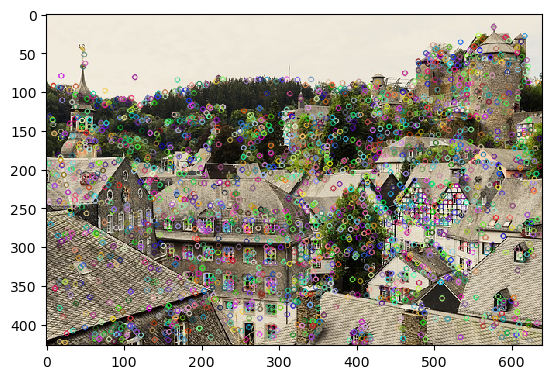

In [22]:
sift1 = SiftDetector()

A = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
kp = sift1.detector.detect(A)
A = cv2.drawKeypoints(I, kp, A)

print(len(kp))
plt.imshow(A)

260


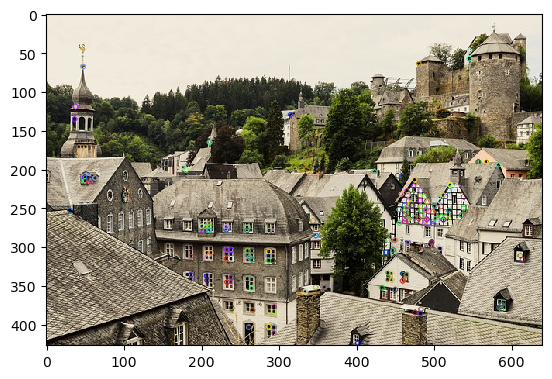

In [23]:
params = {
    "n_features" : 260,
    "n_octave_layers" : 3,
    "contrast_threshold" : 0.23,
    "edge_threshold" : 10,
    "sigma" : 1.6,
}

sift2 = SiftDetector(params=params)
B = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
kp1, des1 = sift2.detector.detectAndCompute(B, None)
B = cv2.drawKeypoints(I, kp1, B)

print(len(kp1))
plt.imshow(B)

The constant_threshold was reduced to reduce the number of keypoints until the number was close to 10% of the original keypoints. The n_features parameter was then set to 260 to limit how many keypoints to be extracted.

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


261


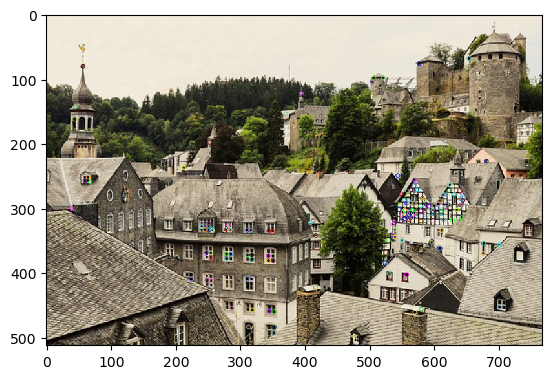

In [24]:
# Write your code here and display images obtained in 2(b) and 2(d). Also, write your answer to 2(c) in a new cell.

scale = 1.2
w, h, _ = I.shape
w = int(w * scale)
h = int(h * scale)

I2 = cv2.resize(I, (h, w), interpolation=cv2.INTER_AREA)
C = cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY)

kp2, des2 = sift2.detector.detectAndCompute(C, None)
C = cv2.drawKeypoints(I2, kp2, C)

print(len(kp2))
plt.imshow(C)


The keypoints in the scaled image is roughly the same as the original image. This implies that the Gaussian filter that SIFT uses to extract keypoints increases the weights of each keypoints neighbour corresponding to the scale.

In [25]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
print(len(matches))

260


## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 65 degrees and separately also by 125 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

In [26]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.
x, y = get_img_center(I)
D = rotate(I, y, x, 65)
E = rotate(I, y, x, 125)

kp3, des3 = sift2.detector.detectAndCompute(D, None)
kp4, des4 = sift2.detector.detectAndCompute(E, None)

D = cv2.drawKeypoints(D, kp3, D)
E = cv2.drawKeypoints(E, kp4, E)


152


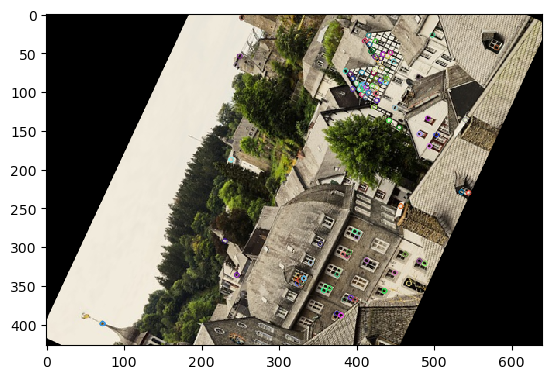

In [27]:
print(len(kp3))
plt.imshow(D)

152


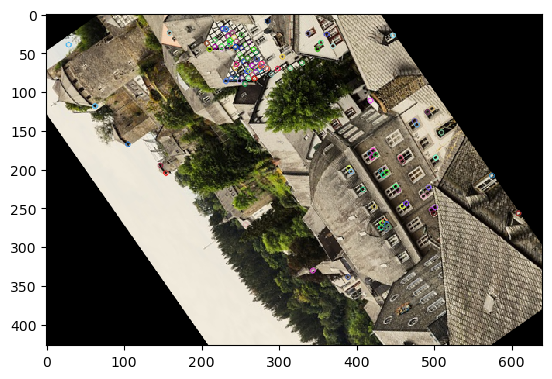

In [28]:
print(len(kp3))
plt.imshow(E)

The keypoints in the rotated images are also roughly the same as the original image. This implies that the algorithm only considers the neighbours of the keypoint relative to each other, thus it is able to recognise textures in any orientation.